# Data Science 100 Project

## introduction:
### Background: 
Video games are a popular way for people to play and connect with others. Game makers and researchers often use newsletters to share updates, events, or news with players. But not every player signs up for these newsletters. If we can find out which players are more likely to subscribe, we can better understand what kinds of players are more interested and involved.

In this project, we look at real data from a Minecraft research server. The data includes player information and how they behave in the game. We want to find out which player features and behaviors are most useful in predicting whether someone will subscribe to the newsletter. This can help game teams and researchers plan better ways to reach the right players.
### link to github:
https://github.com/90419359/data-science-project
### Questin 1 (the selection of the project):
This project explores whether a player’s gender can predict their likelihood of subscribing to a game-related newsletter, and whether this pattern differs across experience levels. Using data from players.csv, we focus on two variables—gender and experience—to compare subscription behavior among different player groups.

The response variable is subscribe (TRUE or FALSE), and the explanatory variable is gender, with experience level used as a secondary grouping variable. The goal is to visualize and describe any patterns that may suggest a relationship between these characteristics and subscription behavior.
### Data Description:
## 1.players.csv
Each row in this dataset represents an individual player. The columns include:
	
    experience: Self-reported gaming experience, categorized as Beginner, Amateur, Regular, Veteran, or Pro.
	
    subscribe: Indicating whether the player subscribed to the server’s content or notifications.
	
    hashedEmail: A pseudonymized identifier for each player.
	
    played_hours: Total number of hours the player has played on the server.
	
    name: The first name of the player.
	
    gender: Gender identity (Male, Female, Non-binary).
	
    age: The player’s self-reported age (integer).

## 2.sessions.csv
Each row represents one gameplay session and includes:
	
    hashedEmail: useless in our project
	
    start_time: The human-readable start time of the session.
	
    end_time: The human-readable end time of the session.
	
    original_start_time: Start time in Unix timestamp format.
	
    original_end_time: End time in Unix timestamp format.

These fields allow for the analysis of session length, activity patterns, and player engagement over time.

In [36]:
library(tidyverse)
library(rsample)

In [37]:
# load the data

#save the website
player_url <-"https://raw.githubusercontent.com/90419359/data-science-project/refs/heads/main/players.csv"
session_url <- "https://raw.githubusercontent.com/90419359/data-science-project/refs/heads/main/sessions.csv"
#download the file
download.file(player_url,destfile ="players.csv")
download.file(session_url,destfile ="sessions.csv")
#read the file
Player_data <- read_csv("players.csv")
Sessions_data <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
Player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [39]:
Sessions_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [40]:
# make the data more clean and perform summaries

In [41]:
Player_data <- Player_data |>
  mutate(gender_simple = ifelse(
    gender == "Male", "Male",
    ifelse(gender == "Female", "Female", "Other")
  ))
Player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,gender_simple
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Male
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Male
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Male
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,Female
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,Male
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Female
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,Female
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,Male
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,Male


In [42]:
gender_subscribe <- Player_data |>
  group_by(gender_simple, subscribe) |>
  summarize(count = n())
gender_subscribe

`summarise()` has grouped output by 'gender_simple'. You can override using the
`.groups` argument.


gender_simple,subscribe,count
<chr>,<lgl>,<int>
Female,FALSE,8
Female,TRUE,29
Male,FALSE,31
Male,TRUE,93
Other,FALSE,13
Other,TRUE,22


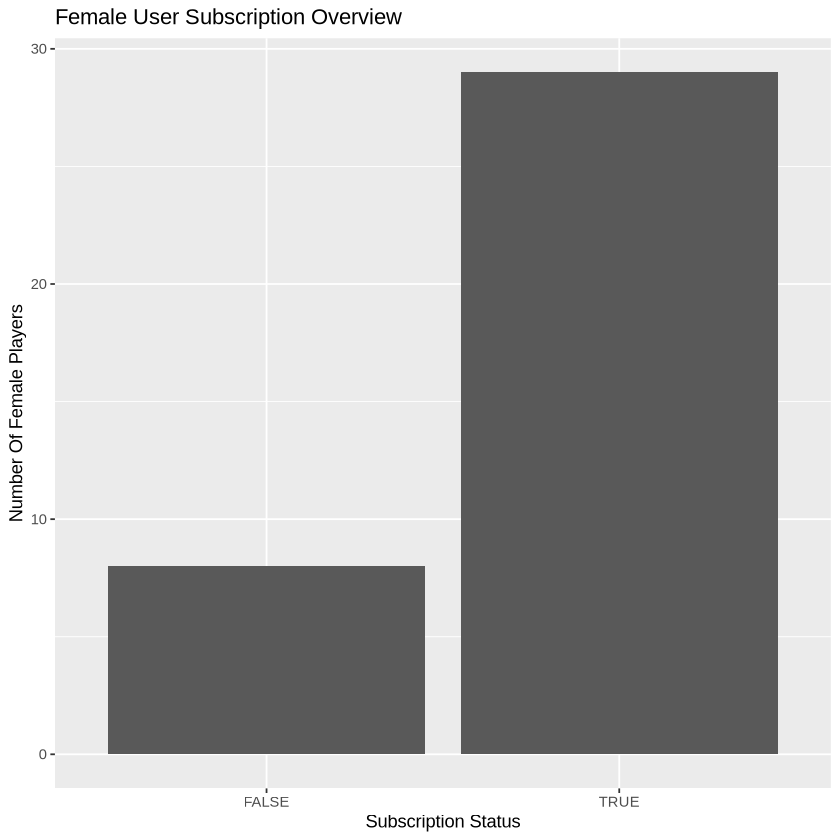

In [43]:
# creates a visualization and explain the relationship between them
gender_subscribe_female_bar <-  gender_subscribe |> 
     filter(gender_simple == "Female") |>
     ggplot(aes(x=subscribe,y=count)) +
     geom_bar(stat="identity")+
     labs(x="Subscription Status",y="Number Of Female Players",title="Female User Subscription Overview") 
gender_subscribe_female_bar

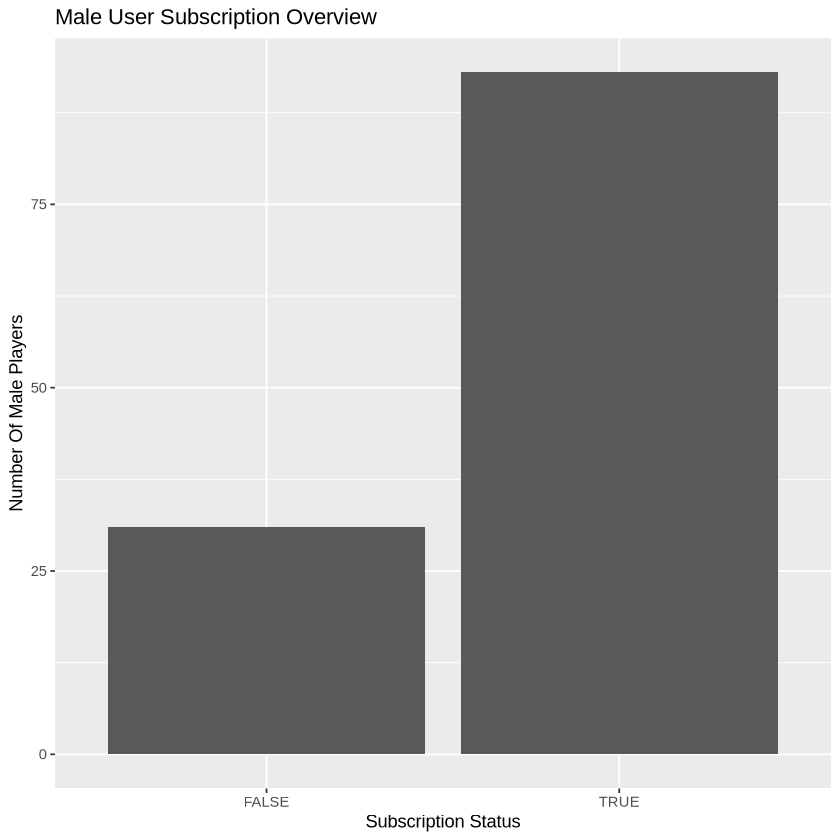

In [44]:
gender_subscribe_male_bar <-  gender_subscribe |> 
     filter(gender_simple == "Male") |>
     ggplot(aes(x=subscribe,y=count)) +
     geom_bar(stat="identity")+
     labs(x="Subscription Status",y="Number Of Male Players",title="Male User Subscription Overview") 
gender_subscribe_male_bar

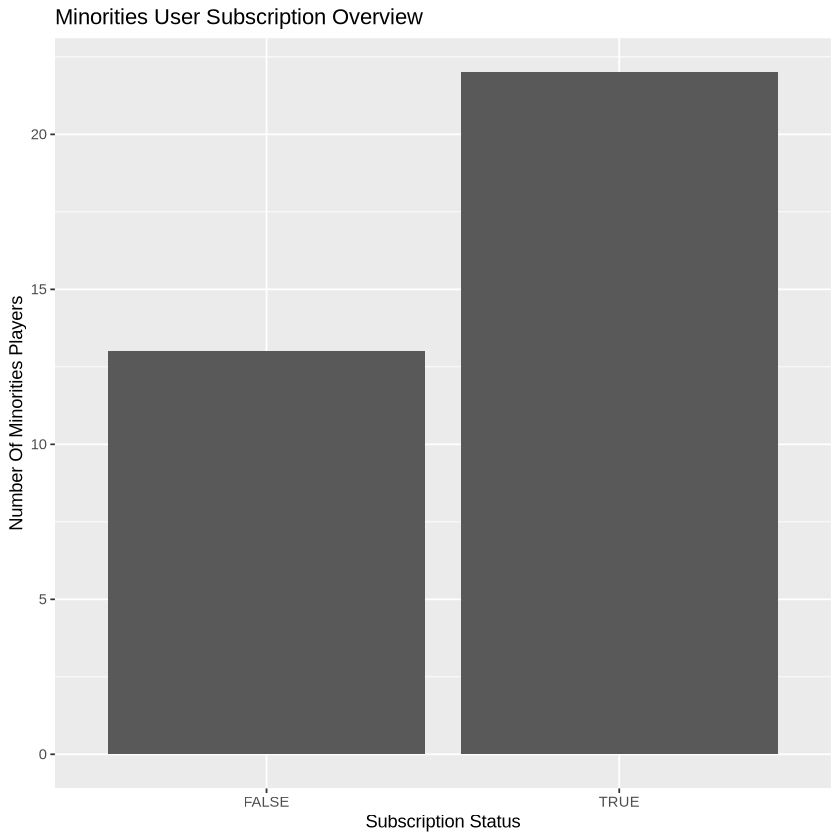

In [45]:
gender_subscribe_gender_minorities_bar <-  gender_subscribe |> 
     filter(gender_simple == "Other") |>
     ggplot(aes(x=subscribe,y=count)) +
     geom_bar(stat="identity")+
     labs(x="Subscription Status",y="Number Of Minorities Players",title="Minorities User Subscription Overview") 
gender_subscribe_gender_minorities_bar

In [46]:
experience_subscribe <- Player_data |>
  group_by(experience, subscribe) |>
  summarize(count = n())
experience_subscribe 

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count
<chr>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


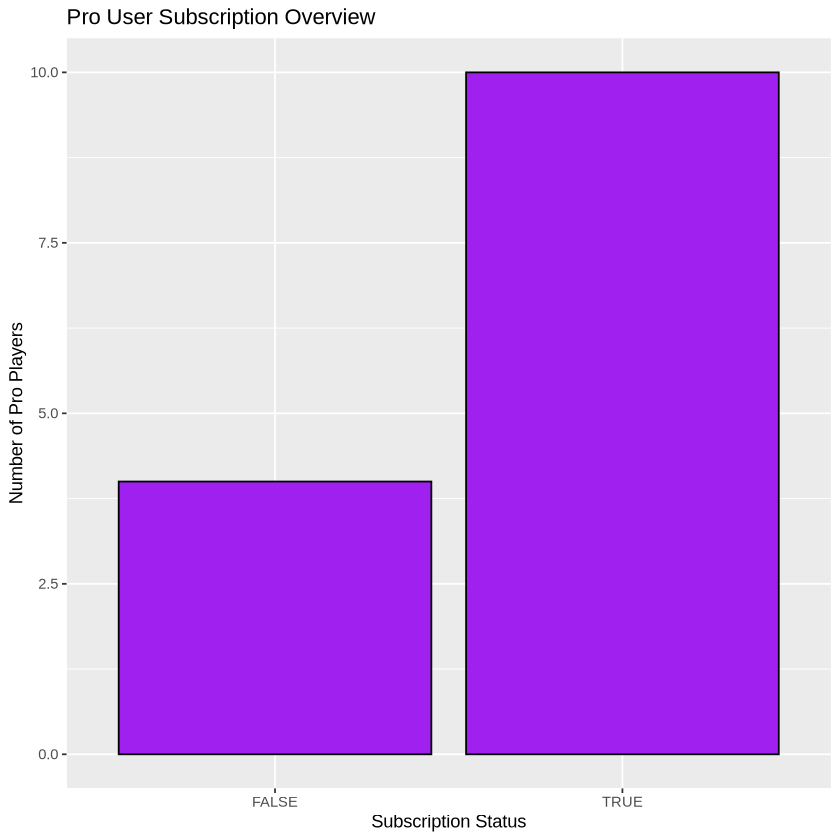

In [47]:
experience_subscribe_pro_bar <- experience_subscribe |> 
  filter(experience == "Pro") |>
  ggplot(aes(x = subscribe, y = count)) +
  geom_bar(stat = "identity",fill="purple",color="black") +
  labs(x = "Subscription Status",
       y = "Number of Pro Players",
       title = "Pro User Subscription Overview")

experience_subscribe_pro_bar

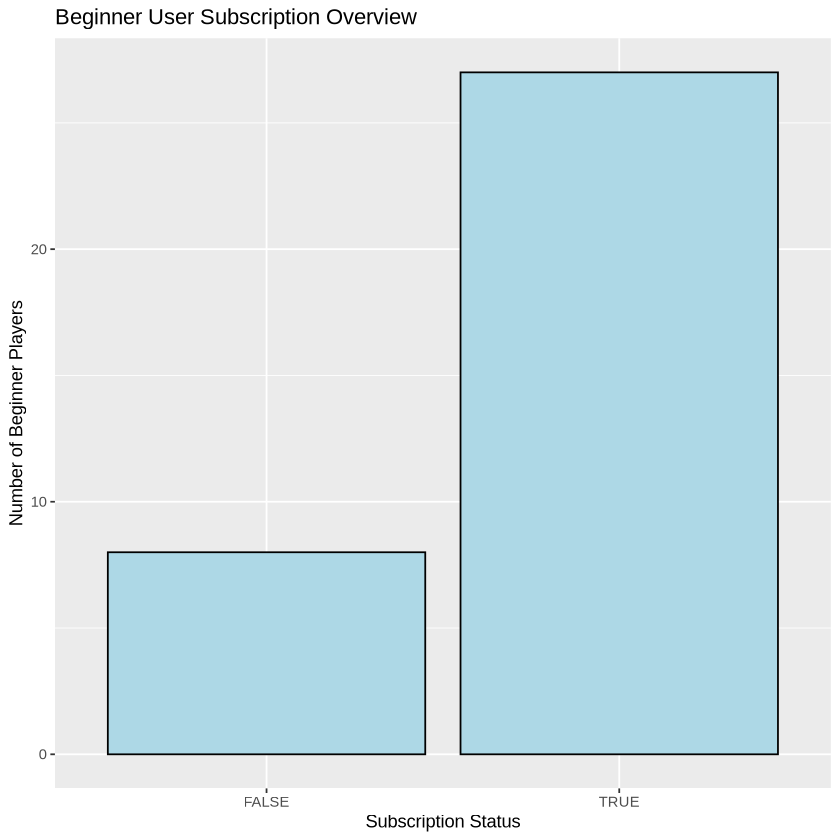

In [48]:
experience_subscribe_beginner_bar <- experience_subscribe |>
  filter(experience == "Beginner") |>
  ggplot(aes(x = subscribe, y = count)) +
  geom_bar(stat = "identity", fill = "light blue", color = "black") +
  labs(x = "Subscription Status",
       y = "Number of Beginner Players",
       title = "Beginner User Subscription Overview")

experience_subscribe_beginner_bar

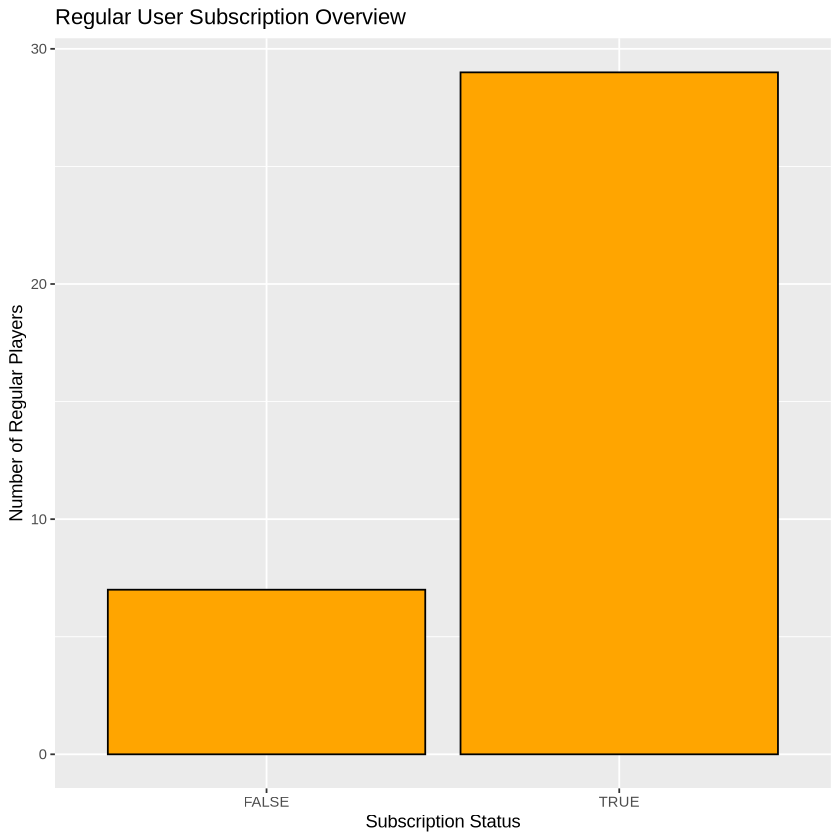

In [49]:
experience_subscribe_regular_bar <- experience_subscribe |>
  filter(experience == "Regular") |>
  ggplot(aes(x = subscribe, y = count)) +
  geom_bar(stat = "identity", fill = "orange", color = "black") +
  labs(
    x = "Subscription Status",
    y = "Number of Regular Players",
    title = "Regular User Subscription Overview"
  )

experience_subscribe_regular_bar

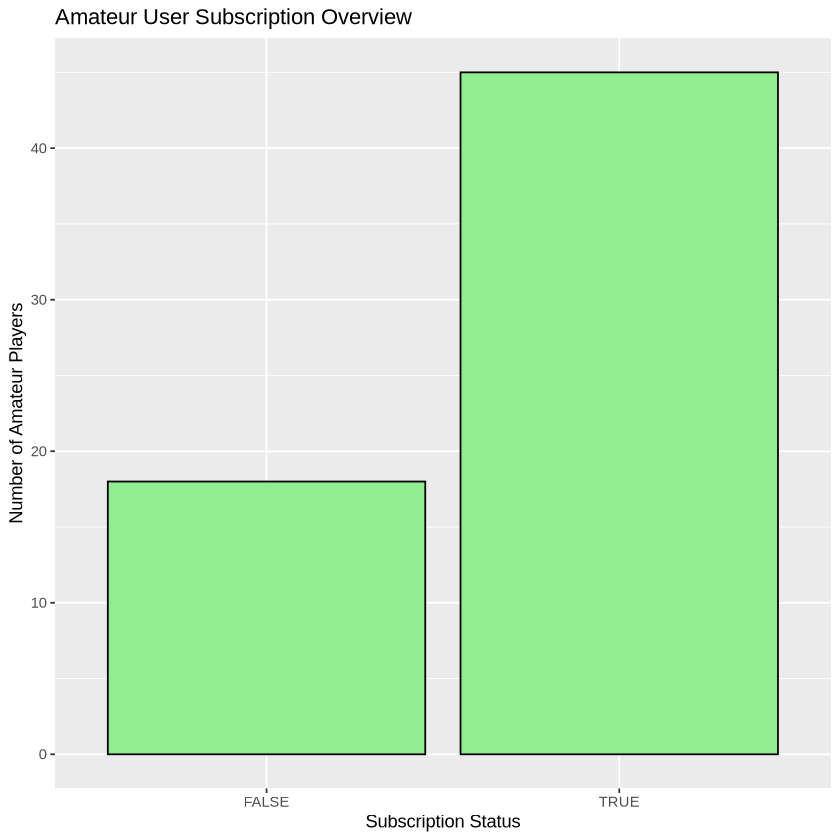

In [50]:
experience_subscribe_amateur_bar <- experience_subscribe |>
  filter(experience == "Amateur") |>
  ggplot(aes(x = subscribe, y = count)) +
  geom_bar(stat = "identity", fill = "light green", color = "black") +
  labs(x = "Subscription Status",
       y = "Number of Amateur Players",
       title = "Amateur User Subscription Overview")

experience_subscribe_amateur_bar

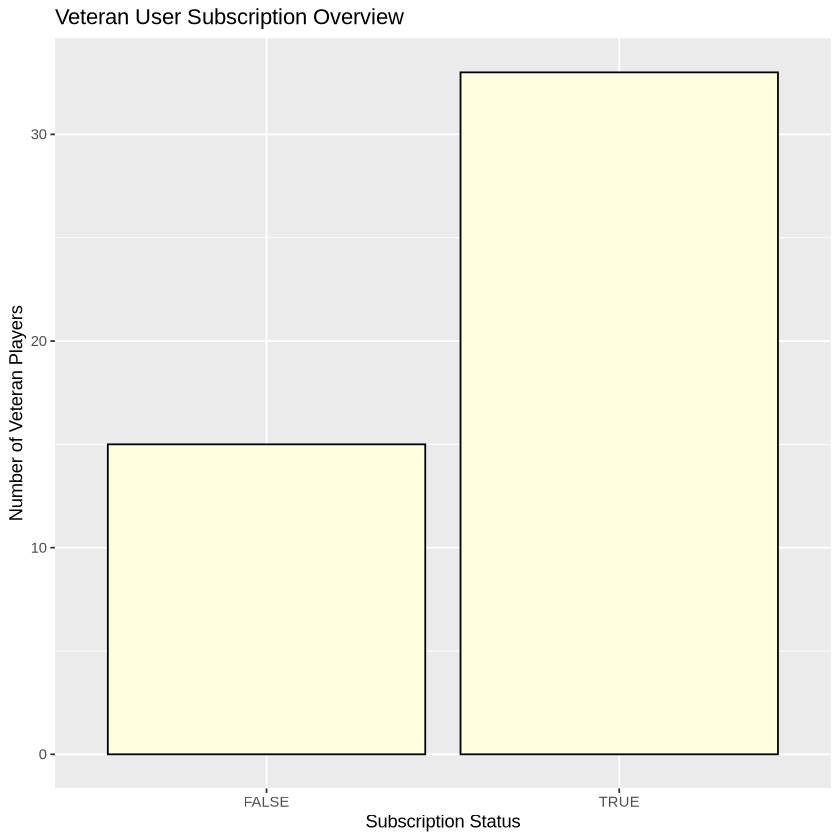

In [51]:
experience_subscribe_veteran_bar <- experience_subscribe |>
  filter(experience == "Veteran") |>
  ggplot(aes(x = subscribe, y = count)) +
  geom_bar(stat = "identity", fill = "light yellow", color = "black") +
  labs(x = "Subscription Status",
       y = "Number of Veteran Players",
       title = "Veteran User Subscription Overview")

experience_subscribe_veteran_bar

In [52]:
Player_data <- Player_data |>
  mutate(
    gender_simple = as.factor(gender_simple),
    experience = as.factor(experience),
    subscribe = as.factor(subscribe)
  )
Player_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,gender_simple
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Male
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Male
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Male
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,Female
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,Male
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Female
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,Female
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,Male
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,Male


In [156]:
library(tidyverse)
library(rsample)    
library(caret)       
library(broom)   
library(tidymodels)


set.seed(42)

In [157]:
data <- Player_data |>
  select(subscribe, gender_simple, experience) |>
  drop_na()
data

subscribe,gender_simple,experience
<fct>,<fct>,<fct>
TRUE,Male,Pro
TRUE,Male,Veteran
FALSE,Male,Veteran
TRUE,Female,Amateur
TRUE,Male,Regular
TRUE,Female,Amateur
TRUE,Female,Regular
FALSE,Male,Amateur
TRUE,Male,Amateur


In [158]:
data_split <- initial_split(data, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

In [171]:
recipe_knn <- recipe(subscribe ~ gender_simple + experience, data = train_data) |>
  step_dummy(all_nominal_predictors()) |>
  step_normalize(all_predictors())

model_knn <- nearest_neighbor(neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

workflow_knn <- workflow() |>
  add_recipe(recipe_knn) |>
  add_model(model_knn) |>
  fit(data = train_data)

pred_knn <- predict(workflow_knn, new_data = test_data) |>
  bind_cols(test_data)

confmat_knn <- conf_mat(pred_knn, truth = subscribe, estimate = .pred_class)
confmat_knn
accuracy_knn <- metrics(pred_knn, truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
accuracy_knn

          Truth
Prediction FALSE TRUE
     FALSE     6   24
     TRUE      5    5

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.275


## Explain any insights you gain from these plots that are relevant to address your question:
From the bar charts of both gender and experience level, we can observe general trends in subscription behavior. Across all genders—Male, Female, and Other—the “Subscribed” bar is consistently higher than the “Not Subscribed” bar. However, the visual difference between male and female players is relatively small, and no strong contrast can be observed without statistical modeling. Players identifying as “Other” also appear more likely to subscribe than not, but the smaller sample size makes it harder to draw firm conclusions. Therefore, gender may have some influence, but the pattern is not particularly strong based on visual evidence alone.

In contrast, experience level shows a much clearer relationship. Beginner and Regular players have noticeably taller “Subscribed” bars, suggesting stronger interest in newsletter features. Amateur players show a moderate difference, while Pro and Veteran players are more evenly split. These visual differences across experience levels are more apparent and consistent.

Building on this visual analysis, a K-Nearest Neighbors (KNN) classifier was used to predict whether players would subscribe, based on their gender and experience. The performance of the model was evaluated using a confusion matrix, and the resulting accuracy was only 27.5%. This low accuracy indicates that, while gender and experience may appear related to subscription behavior in the bar charts, they do not provide strong predictive power when used in a classification model.

In summary, although the bar charts suggest potential relationships, the poor predictive performance of the KNN model implies that these variables alone are not sufficient to reliably predict subscription outcomes. Additional features—such as playtime, age, or engagement metrics—may be necessary to build a more accurate model.

## data analysis:
### 1. Why is this method appropriate?
This method is appropriate because the goal is to predict a categorical outcome (subscribe) based on other categorical predictors (gender_simple and experience). K-Nearest Neighbors (KNN) classification is a non-parametric method that works well with categorical features after preprocessing. By normalizing predictors and converting categories to dummy variables, KNN can identify patterns in the data and make accurate predictions based on similarity between observations.
### 2.Which assumptions are required, if any, to apply the method selected?
KNN does not assume a specific distribution of the data (e.g., normality or linearity), making it a flexible choice. However, it assumes:
	•	The distance metric (e.g., Euclidean distance) meaningfully reflects similarity between observations.
	•	The data have been properly scaled and encoded.
	•	Observations are independent.
### 3.What are the potential limitations or weaknesses of the method selected?
    •	KNN can be sensitive to irrelevant or highly correlated features, which may distort the distance metric.
	•	Performance degrades on imbalanced data, especially if some classes are underrepresented.
	•	The choice of K (number of neighbors) affects accuracy and is not always obvious without tuning.
	•	It may be computationally expensive on large datasets.
### 4.How did you compare and select the model?
Only one classification model (KNN) was applied in this analysis. The model was selected because it aligns with the course focus and handles categorical prediction well after preprocessing. No hyperparameter tuning or model comparison (e.g., versus logistic regression or decision trees) was performed in this version.
### 5.How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
The data were processed as follows:
1.Filtered to remove missing values and convert subscribe to a factor.
2.Split into training and testing sets using initial_split() with 80% training and 20% testing, stratified by subscribe.
3.Preprocessed using a recipe():
4.step_dummy() to encode categorical predictors.
5.step_normalize() to scale predictors for distance-based KNN.
6.Trained the KNN classifier on training data.
7.Evaluated using predictions on the testing set with a confusion matrix and accuracy score.

# Discussion

This analysis found that both gender and experience level are related to a player’s likelihood of subscribing to a game-related newsletter. In particular, beginner and regular players showed stronger subscription tendencies, while pro and veteran players were more balanced. Although female players appeared slightly more likely to subscribe than male players, the difference was small based on visual inspection. Players identifying as other genders also showed a tendency to subscribe, but the small sample size makes this harder to interpret.

These results were somewhat in line with expectations. It is reasonable to expect that newer or more casually engaged players might be more receptive to outreach like newsletters, while more experienced players may be less influenced. The subtle gender differences were expected but not especially pronounced.

The findings suggest that targeting users based on experience level may be more effective for increasing newsletter engagement. This could be useful for the game research team when deciding how to focus communication strategies or future recruitment efforts.

Future questions could include:1：Are there interaction effects between gender and experience? 2：Could a predictive model (e.g., logistic regression) help confirm these relationships? These directions could extend the current findings and lead to deeper understanding.